# Homework 3: K-fold & Binary Classification

Follow the instructions in the template, score will be given uppon it.

## Import libraries
You are allowed to use these libraries only.

In [ ]:
import pandas as pd
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

## Load external data

In [ ]:
data = pd.read_csv("Homework 3 data.csv")
print(data.shape)
X, y = data.values[:,:-1], data.values[:, -1]
print(X.shape)
print(y.shape)


Scale the data using StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)
sc_df = pd.DataFrame(scaled, columns=data.columns[:-1])
sc_df.head()

# Part 1: K-fold ROC Plot

Write down a function that recives the following argumnets: <br><br>
`X` - The input data in the usual format (2d numpy array)<br><br>
`y` - The output data in the usual format (1d numpy array)<br><br>
`clf` - A sklearn classifier with the methods predict_proba and fit<br><br>
`k` - the number of folds as it appears in Kfold.<br><br>

The function should return nothing. Instead, it should plot an ROC curve with the calculated AUC. A different curve should be made for each fold (from the K-fold cross validation). In addition, the mean ROC curve should be marked, and its AUC is the one to be presented.
An example is presented on k-nn classifier.

Small remark: you might find the "interp" function helpful in order to calculate the mean ROC curve.<br>
We need it because the tpr/fpr values are going to be be different between folds. in order to average over some axis (let's say the fpr) we have to align them. we can do so by interpolating them to a common grid.<br>

In [ ]:
#### example of using np.interp: #####
# say we have values x and related values f(x) created by some function f
# we want to calculate the values of f in some other locations x_
# we can do so by linear interpolation, that is assuming that f is linear between the values we have.
# of course this is not always the case but it is a good guess if we have enough points x

x = [1,2,3]
f_of_x = [0.25, 0.5, 1]

# we want to interpolate what will be the value of the function f for x = 1.5, 2.2 and 2.8
x_ = [1.5,2.2,2.8]

y_interp = interp(x_, x, f_of_x)

plt.scatter(x, f_of_x, label="real value")
plt.plot(x, f_of_x)
plt.scatter(x_, y_interp, label="interpolated values")
plt.legend()

In [ ]:
def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits=k)
    plt.figure(figsize=(5,5), dpi = 100)
    fold = 1
    
    mean_tpr = 0
    mean_fpr = np.linspace(0, 1, 100)
    
    for train_index, test_index in kf.split(X):
        print ("fold No.",fold)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, pred)
        ##auc = auc(fpr, tpr)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0
        plt.plot(fpr, tpr, color='#D3D3D3')
        
        fold+=1
    
    mean_tpr /= k
    auc_ = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='red', label='Mean ROC (area = %0.3f)' % auc_)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC for'+str(clf))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    plt.legend()
    plt.show()

### Usage example on knn-classifier

fold No. 1
fold No. 2
fold No. 3
fold No. 4
fold No. 5
fold No. 6
fold No. 7
fold No. 8
fold No. 9
fold No. 10


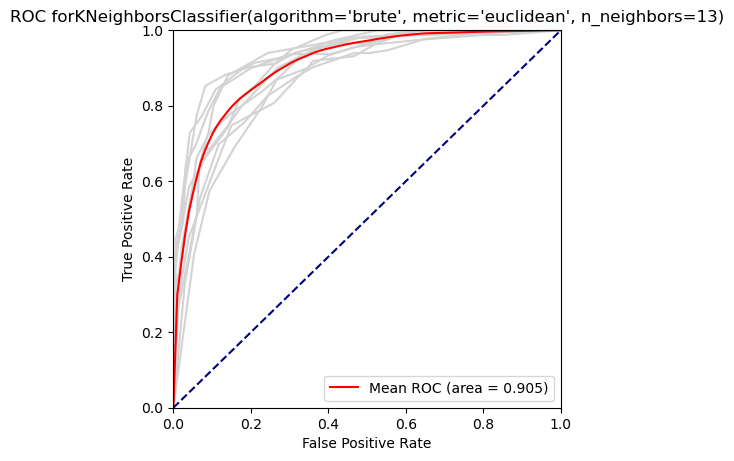

In [6]:
knnclf = KNeighborsClassifier(n_neighbors=13, 
                                     weights="uniform", 
                                     metric="euclidean",
                                     algorithm= "brute")

KfoldPlot(X, y, knnclf, 10)

## Usage
Use the function with Logistic Regression classifier

fold No. 1
fold No. 2
fold No. 3


C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

fold No. 4
fold No. 5


C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

fold No. 6
fold No. 7


C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold No. 8
fold No. 9


C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

fold No. 10


C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


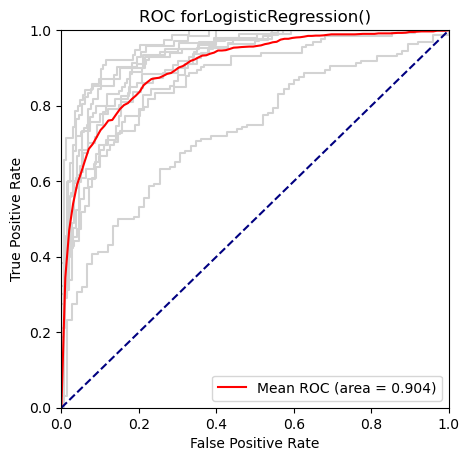

In [7]:
lr = LogisticRegression()
KfoldPlot(X, y, lr, 10)

# Part 2

The following code downloads the MNIST data set (one of the most common data set in machine learning).<br>
It contains images of hand written digits in gray scale. The training data contains 60,000 images (6,000 from each digit), and 10,000 test set. Each image is a 28X28 pixel image (total of 784 pixels).<br>
a few examples:<br>
<img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="200"/>
In this exercise we shall classify the digits 0 and 8. The following code downloads the data set, splits it to train validation and test, and scales each feature (pixel) to have zero mean accross the samples. The labels are changed to -1 (for 0) and 1 (for 8)

In [8]:
import sys
import os
from numpy import *
import numpy as np
import numpy.random
from sklearn.datasets import fetch_openml
import sklearn.preprocessing
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix

In [9]:
######### data preparation #########
# you may ignore this and only use it's outputs:
#
# 3 datasets for train, validation and test - 
#   * train_data, train_labels
#   * validation_data, validation_labels
#   * test_data, test_labels

data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

neg, pos = '0', '8'
train_idx = numpy.random.RandomState(0).permutation(
    where((labels[:60000] == neg) | (labels[:60000] == pos))[0])
test_idx = numpy.random.RandomState(0).permutation(where((labels[60000:] == neg) | (labels[60000:] == pos))[0])

train_data = data[train_idx[:6000], :].astype(float)
train_labels = (labels[train_idx[:6000]] == pos) * 2 - 1

validation_data = data[train_idx[6000:], :].astype(float)
validation_labels = (labels[train_idx[6000:]] == pos) * 2 - 1

test_data = data[60000 + test_idx, :].astype(float)
test_labels = (labels[60000 + test_idx] == pos) * 2 - 1

## To visualize a digit, we can use the following code

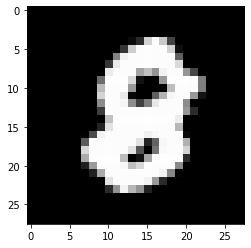

In [10]:
digit = train_data[0] #use the scaled data to see what actually is trained on
plt.figure(0)
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

## 1. LogisticRegression (lr)

1. Run logistic regression on the train data with 'l2' regularization (a.k.a ridge regularization) with solver='liblinear'. <br> Use the validation data to choose the best regularization parameterr C out of the given list, with respect to accuracy measure.<br> plot the validation accuracy vs the powers array (scale of C) and print the best C value.
2. Train Logistic regression on the whole data (train+validation).
3. Given that the decision boundary is 0.5, plot the confusion matrix, and print the accuracy of the train data.
4. Given that the decision boundary is 0.5, plot the confusion matrix, and print the accuracy of the test data.
5. Plot one missclassified 8 digit and one missclassified 0 digit.

Comment: you may use the 'confusion_matrix' imported above from sklearn.metrics (not mandatory)

In [11]:
from sklearn.linear_model import LogisticRegression
powers = range(-10,0)

# C is the inverse of the lambda we saw in calss for regularization strength
# so small C == strong regularization
Cs = [10**p for p in powers]

### Choosing the optimal `C`

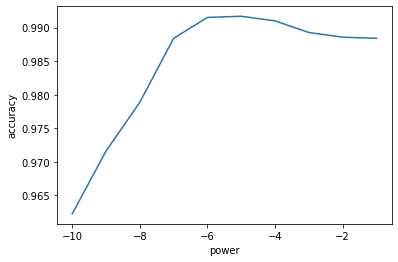

The optimal C is:  1e-05


In [12]:
#fill in the code to choose the best C
C_opt_lr = 0.0000000000000
ac_score = 0.0
ac_list = []

for c in Cs:
    lre = LogisticRegression(penalty="l2", C= c,solver='liblinear')
    lre.fit(train_data, train_labels)
    score = lre.score(validation_data, validation_labels)
    ac_list.append(score)
    if score > ac_score:
        ac_score = score
        C_opt_lr = c

plt.plot(powers, ac_list)
plt.xlabel("power")
plt.ylabel("accuracy")
plt.show()
print("The optimal C is: ",C_opt_lr)



### Using the lr best model (the one with the optimal `C`)

In [13]:
lre = LogisticRegression(penalty="l2", C= C_opt_lr, solver='liblinear')
lre.fit(np.concatenate((train_data, validation_data)), np.concatenate((train_labels, validation_labels)))
print("train accuracy", lre.score(np.concatenate((train_data, validation_data)), np.concatenate((train_labels, validation_labels))))
preds = lre.predict(test_data)
print(confusion_matrix(test_labels, preds))
print("test accuracy:", lre.score(test_data, test_labels))



train accuracy 0.9968574825887548
[[977   3]
 [ 11 963]]
test accuracy: 0.9928352098259979


### Plotting 2 missclassified digits

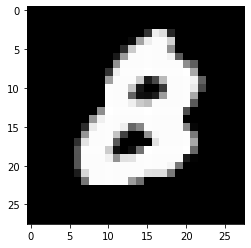

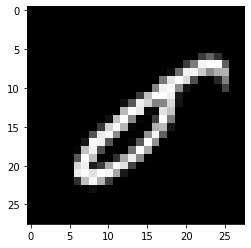

In [26]:
incorrect = preds!=test_labels
eights = test_labels[incorrect]==1
zeros = test_labels[incorrect]==-1

digit8 = test_data[incorrect][eights][0]
digit0 = test_data[incorrect][zeros][0]
plt.figure(0)
plt.imshow(digit8.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

plt.figure(0)
plt.imshow(digit0.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

## 2. Multi Layer Perceptron (MLP)

1. Run MLP on the train data with 'l2' regularization (a.k.a ridge regularization) with the following parameters:<br>
   `hidden_layer_sizes=(20,), max_iter=200, solver='sgd', verbose=False, tol=1e-4, random_state=1,
   learning_rate_init=.1, alpha=?????`<br>
   The alpha parameter is the 'l2' coefficient (regularization strength).<br>
   * Below you can find possible alpha values. Use the validation data to choose the best one with respect to the accuracy measure.<br>
   * plot the validation accuracy vs alpha values (use log scale if needed)
   * print the best alpha value.
2. Train Logistic regression on the whole data (train+validation).
3. Given that the decision boundary is 0.5, plot the confusion matrix, and print the accuracy of the train data.
4. Given that the decision boundary is 0.5, plot the confusion matrix, and print the accuracy of the test data.
5. Plot one missclassified 8 digit and one missclassified 0 digit.

*Comment1*: you may use the 'confusion_matrix' imported above from sklearn.metrics (not mandatory)<br>
*Comment2*: to see the loss convergence between epochs, use verbose=True. Just replace it back to False before submission.

In [15]:
from sklearn.neural_network import MLPClassifier
powers = range(-1,5)
alphas = [10**(p) for p in powers]

### Choosing the optimal alpha

C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:232: RuntimeWarning: overflow encountered in double_scalars
  loss += (0.5 * self.alpha) * values / n_samples
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:232: RuntimeWarning: overflow encountered in double_scalars
  loss += (0.5 * self.alpha) * values / n_samples
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: ov

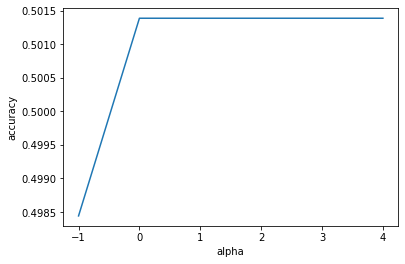

The optimal alpha is:  1


In [16]:
#fill in the code to choose the best alpha
acc = []
best_acc = -100
alpha_opt_mlp = 0.0

for a in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=200, solver='sgd', verbose=False, tol=1e-4, random_state=1,learning_rate_init=.1, alpha=a)
    mlp.fit(train_data, train_labels)
    score = mlp.score(validation_data, validation_labels)
    acc.append(score)
    if score > best_acc:
        best_acc = score
        alpha_opt_mlp = a

plt.plot(powers, acc)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()
print("The optimal alpha is: ",alpha_opt_mlp)


### Using the best MLP model

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=200, solver='sgd', verbose=False, tol=1e-4, random_state=1,learning_rate_init=.1, alpha=alpha_opt_mlp)
mlp.fit(np.concatenate((train_data,validation_data)), np.concatenate((train_labels,validation_labels)))
predicts = mlp.predict(test_data)
print("train accuracy:", mlp.score(np.concatenate((train_data, validation_data)), np.concatenate((train_labels, validation_labels))))
print(confusion_matrix(test_labels, predicts))
print("test accuracy:", mlp.score(test_data, test_labels))

train accuracy: 0.4969424154917615
[[  0 980]
 [  0 974]]
test accuracy: 0.4984646878198567


### plotting 2 missclassified digits

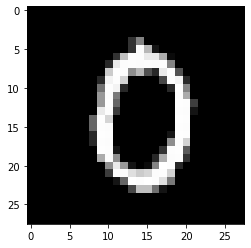

In [33]:
incorrect_mlp = predicts!=test_labels
eights = test_labels[incorrect_mlp]==1
zeros = test_labels[incorrect_mlp]==-1

##d8igit_mlp = test_data[incorrect_mlp][eights][0]
##plt.figure(0)
##plt.imshow(digit8_mlp.reshape(28, 28), cmap=plt.cm.gray)
##plt.show()

digit0_mlp = test_data[incorrect_mlp][zeros][0]
plt.figure(0)
plt.imshow(digit0_mlp.reshape(28, 28), cmap=plt.cm.gray)
plt.show()